# Plots

In [57]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from columns import *

# Load data

In [2]:
# Original dataset
org_train_df = pd.read_csv('/Volumes/DataDrive/merged/en-train.csv')
org_test_df = pd.read_csv('/Volumes/DataDrive/merged/en-test.csv')
# Modified data (generated PerfectMatch labels)
mod_train_df = pd.read_csv('/Volumes/DataDrive/merged/en-train-extended-2.csv')
mod_test_df = pd.read_csv('/Volumes/DataDrive/merged/en-test-extended-2.csv')

# Data distribution plot

In [3]:
def distribution_plot(df, save_to=None):
    duplicate = df[df.relevance == 'PerfectMatch']
    non_duplicate = df[df.relevance != 'PerfectMatch']
    
    labels = ('Duplicate', 'Non-duplicate')
    sizes = [len(duplicate), len(non_duplicate)]

    fix, ax = plt.subplots()
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    ax.axis('equal')
    
    if save_to is not None:
        plt.savefig(save_to)
        
    plt.show()

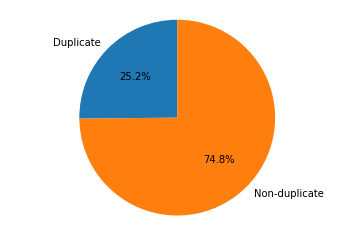

In [30]:
distribution_plot(mod_train_df, save_to='plots/train_data_distribution.png')

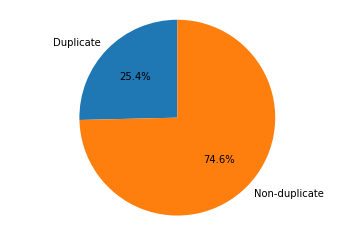

In [31]:
distribution_plot(mod_test_df, save_to='plots/test_data_distribution.png')

# Show data stats

In [52]:
org_train_stats_df = pd.read_csv('/Volumes/DataDrive/stats/en_train_stats.csv')
org_test_stats_df = pd.read_csv('/Volumes/DataDrive/stats/en_test_stats.csv')

In [58]:
def box_plot(df, key, title, show_plot=True, save_to=None):
    # Load data for different 
    non_duplicate = df[df.relevance != 'PerfectMatch'][key].values
    duplicate = df[df.relevance == 'PerfectMatch'][key].values
    
    assert(len(duplicate) + len(non_duplicate) == len(df))
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6,6), sharey=True)

    # PerfectMatch plot
    axes[0].boxplot(non_duplicate, showfliers=False)
    axes[0].set_title('Relevance: Non-duplicate')
    axes[0].get_xaxis().set_visible(False)
    
    axes[1].boxplot(duplicate, showfliers=False)
    axes[1].set_title('Relevance: Duplicate')
    axes[1].get_xaxis().set_visible(False)

    fig.suptitle(title)
    
    if save_to is not None:
        plt.savefig(save_to)
    
    plt.show()

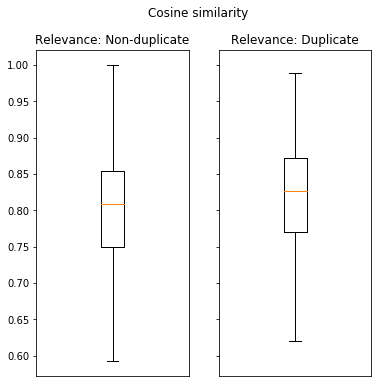

In [59]:
# Show boxplot for given key
box_plot(org_train_stats_df, W2V_COSINE_SIMILARITY, 'Cosine similarity')

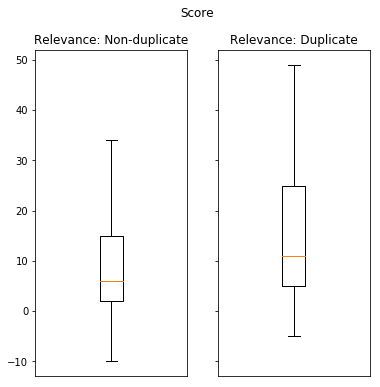

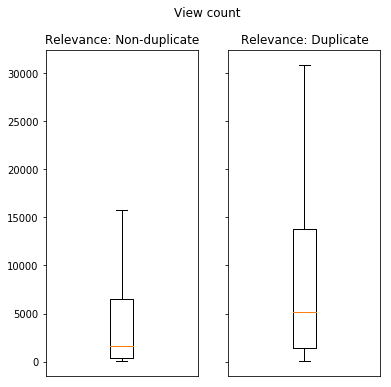

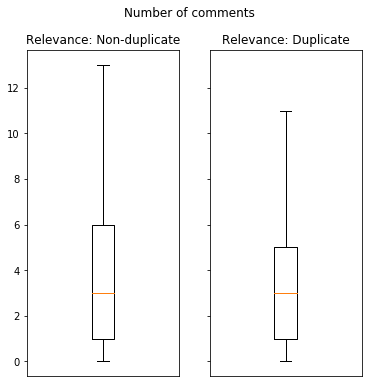

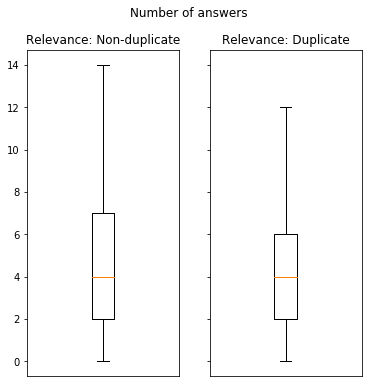

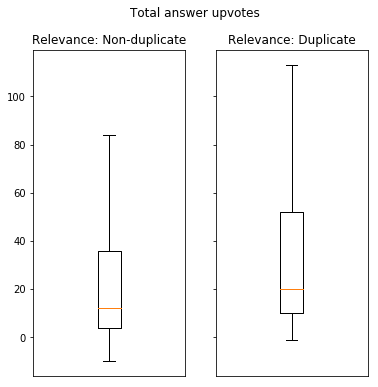

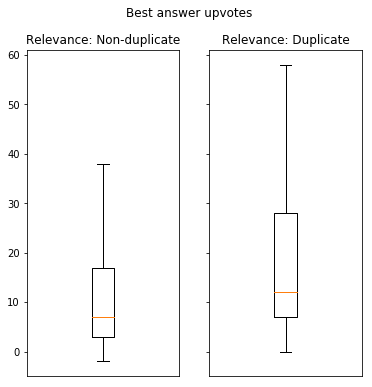

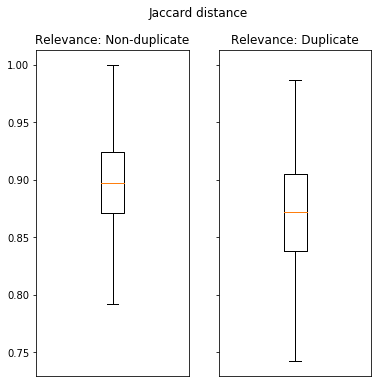

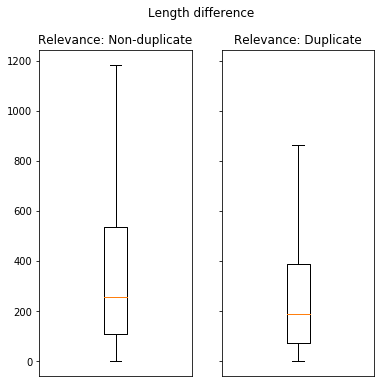

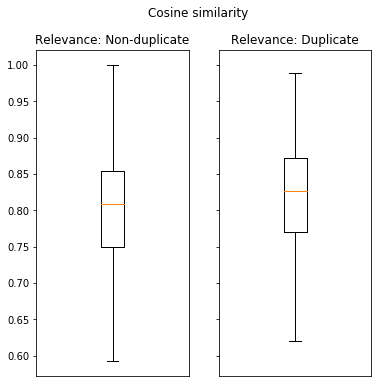

In [61]:
# Generate all plots
box_plot(org_train_stats_df, SCORE, 'Score', save_to='plots/en_train_score.png')
box_plot(org_train_stats_df, VIEW_COUNT, 'View count', save_to='plots/en_train_view_count.png')
box_plot(org_train_stats_df, NO_OF_COMMENTS, 'Number of comments', save_to='plots/en_train_no_of_comments.png')
box_plot(org_train_stats_df, NO_OF_ANSWERS, 'Number of answers', save_to='plots/en_train_no_of_answers.png')
box_plot(org_train_stats_df, TOTAL_ANSWER_UPVOTES, 'Total answer upvotes', save_to='plots/en_train_total_answer_upvotes.png')
box_plot(org_train_stats_df, BEST_ANSWER_UPVOTES, 'Best answer upvotes', save_to='plots/en_train_best_answer_upvotes.png')
box_plot(org_train_stats_df, JACCARD_DISTANCE, 'Jaccard distance', save_to='plots/en_train_jaccard_distance.png')
box_plot(org_train_stats_df, LENGTH_DIFFERENCE, 'Length difference', save_to='plots/en_train_length_difference.png')
box_plot(org_train_stats_df, W2V_COSINE_SIMILARITY, 'Cosine similarity', save_to='plots/en_train_cosine_similarity')